In [26]:
import numpy as np
from ACO import AntColonyOptimizer
from TSP import TSP
from NN import NearestNeighbour
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

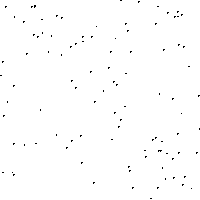

In [27]:
tsp = TSP(n_nodes=100)
tsp.render(dim=200)

/home/random/Desktop/ant-colony-tsp/src/TSP.py:57: RuntimeWarning: divide by zero encountered in true_divide
  arr = np.divide(1, self.d)


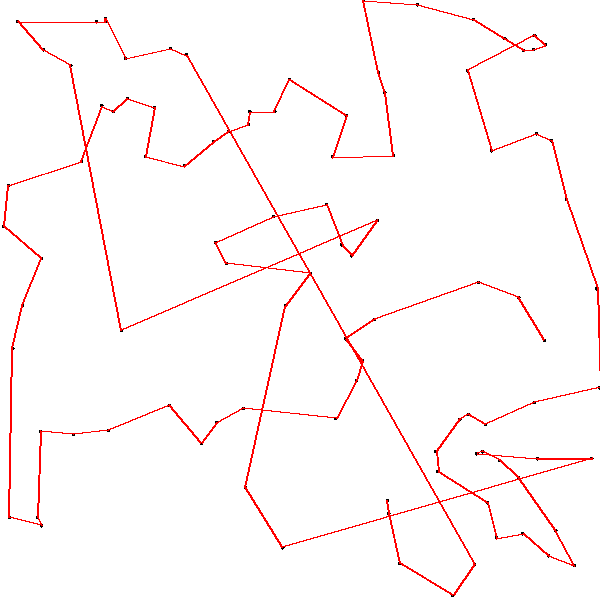

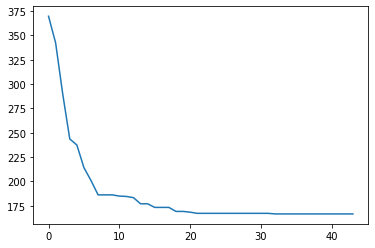

In [28]:
ant_colony_optimizer = AntColonyOptimizer(tsp, n_ants=100, evap_rate=0.5, alpha=1, beta=2)
best_path, distances = ant_colony_optimizer.run(max_iter=100, convergence_steps = 10)
iterations = len(distances)

tsp.render(paths=[best_path])

plt.plot(distances)

In [29]:
tsp = TSP(n_nodes=100, height=100, width=100)
results_df = pd.DataFrame()

results = {}
for evap in [0.25, 0.5, 0.75]:
    for alpha in [0.1, 0.5, 1, 2, 10]:
        results['alpha'] = alpha
        for beta in [0.1, 0.5, 1, 2, 10]:
            results['beta'] = beta
            print(f"{results_df.shape[0]}", end="\r")
            ant_colony_optimizer = AntColonyOptimizer(tsp, n_ants=10, evap_rate=0.25, alpha=alpha, beta=beta)
            best_path, distances = ant_colony_optimizer.run(max_iter=100, convergence_steps = 10)

            results['iterations'] = len(distances)
            results['distance'] = min(distances)
            results['evap_rate'] = evap
            results_df = results_df.append(results, ignore_index=True)


/home/random/Desktop/ant-colony-tsp/src/TSP.py:57: RuntimeWarning: divide by zero encountered in true_divide
  arr = np.divide(1, self.d)


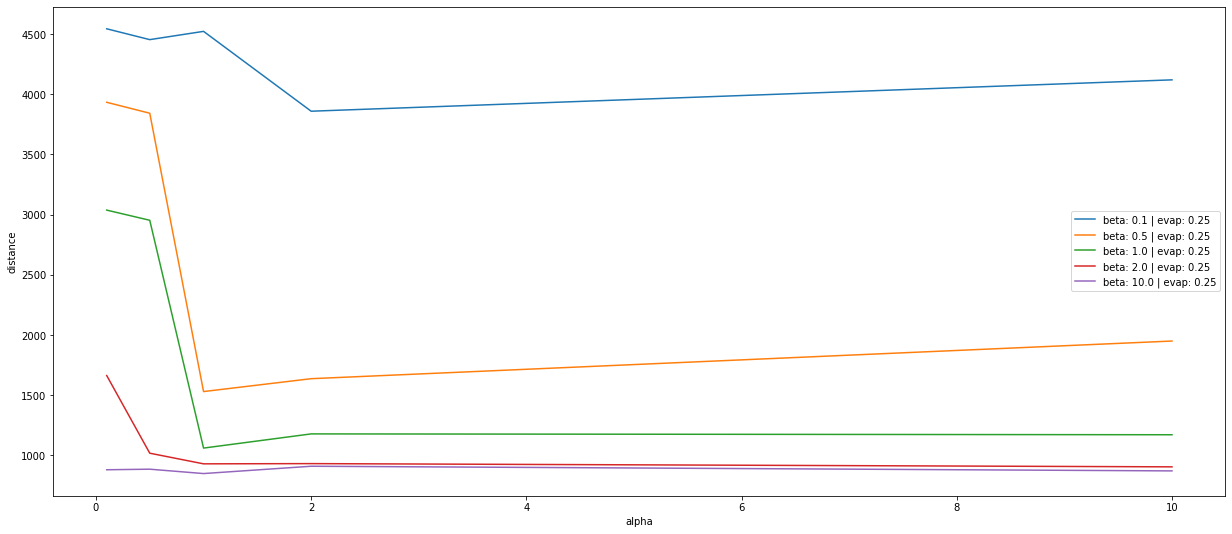

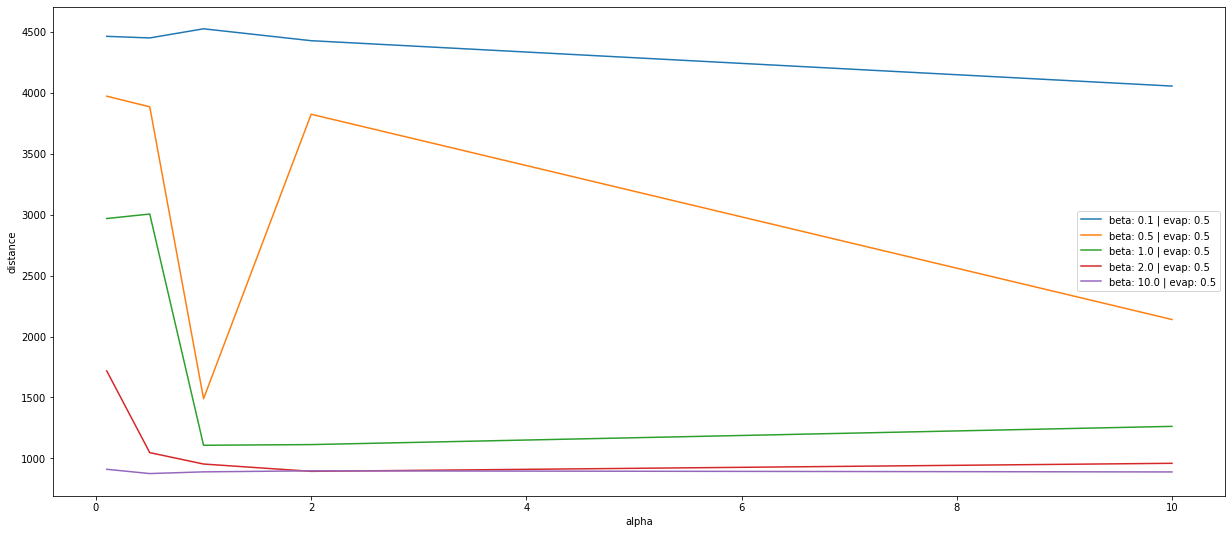

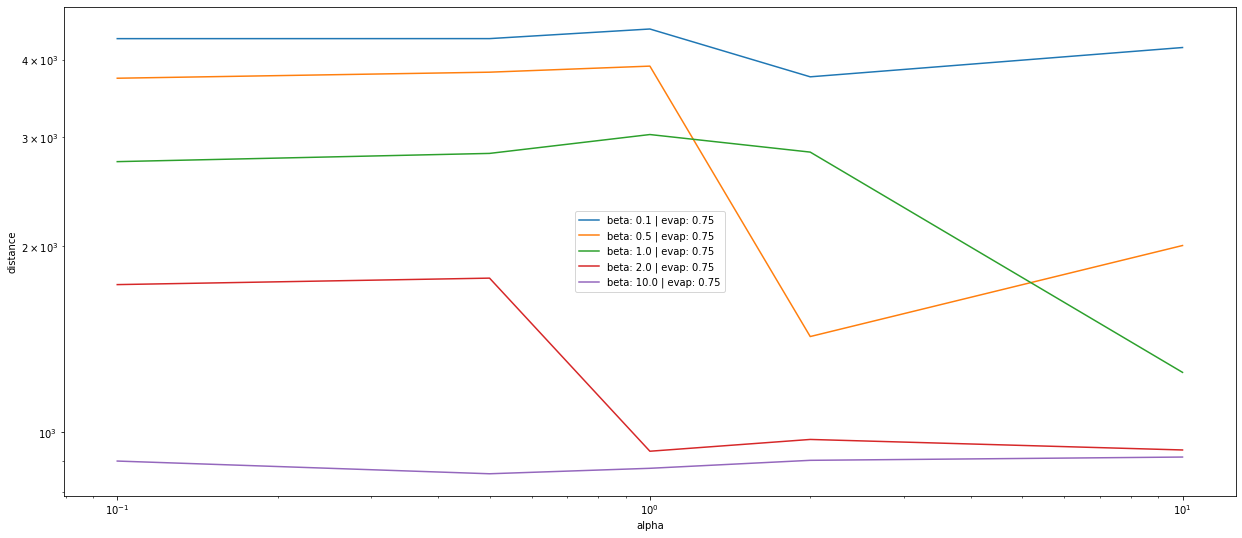

In [30]:
for e in results_df['evap_rate'].unique():
    visualize_df = results_df[results_df['evap_rate'] == e]
    plt.figure(figsize=(21, 9))
    for v in results_df['beta'].unique():
        sns.lineplot(data=visualize_df[visualize_df['beta'] == v], x='alpha', y='distance', legend='brief', label=f"beta: {v} | evap: {e}")
plt.xscale('log')
plt.yscale('log')

In [31]:
results_df[results_df['distance'] == min(results_df['distance'])]

,alpha,beta,distance,evap_rate,iterations
14,1.0,10.0,848.069438,0.25,35.0


In [32]:
tsp = TSP(n_nodes=100, height=100, width=100)
results_df = pd.DataFrame()

results = {}
for ants in [50, 100, 500]:
    results['ants'] = ants
    for steps in [10, 100, 1000]:        
        results['steps'] = steps
        print(f"{results_df.shape[0]}", end="\r")
        ant_colony_optimizer = AntColonyOptimizer(tsp, n_ants=ants, evap_rate=0.25, alpha=1, beta=10)
        best_path, distances = ant_colony_optimizer.run(max_iter=10000, convergence_steps = steps)

        results['iterations'] = len(distances)
        results['distance'] = min(distances)
        results_df = results_df.append(results, ignore_index=True)


/home/random/Desktop/ant-colony-tsp/src/TSP.py:57: RuntimeWarning: divide by zero encountered in true_divide
  arr = np.divide(1, self.d)


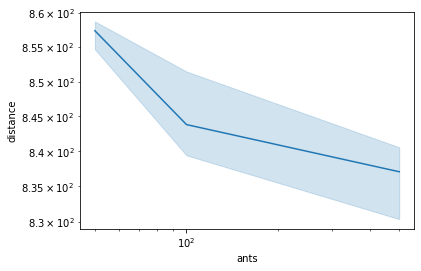

In [33]:
sns.lineplot(data=results_df, x='ants', y='distance')
plt.yscale('log')
plt.xscale('log')

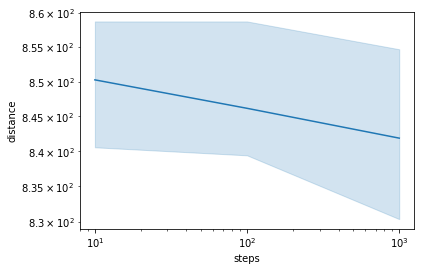

In [34]:
sns.lineplot(data=results_df, x='steps', y='distance')
plt.yscale('log')
plt.xscale('log')

In [35]:
tsp = TSP(n_nodes=100, height=100, width=100)
results_df = pd.DataFrame()

results = {}
for random in [True, False]:
    print(f"{results_df.shape[0]}", end="\r")
    ant_colony_optimizer = AntColonyOptimizer(tsp, n_ants=100, evap_rate=0.25, alpha=1, beta=10)
    best_path, distances = ant_colony_optimizer.run(max_iter=100, convergence_steps = 10, random_start=random)

    results['iterations'] = len(distances)
    results['distance'] = min(distances)
    results['random_start'] = random
    results_df = results_df.append(results, ignore_index=True)

/home/random/Desktop/ant-colony-tsp/src/TSP.py:57: RuntimeWarning: divide by zero encountered in true_divide
  arr = np.divide(1, self.d)


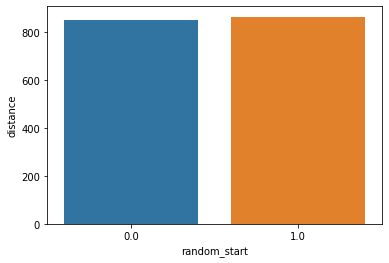

In [36]:
sns.barplot(data=results_df, x='random_start', y='distance')

/home/random/Desktop/ant-colony-tsp/src/TSP.py:57: RuntimeWarning: divide by zero encountered in true_divide
  arr = np.divide(1, self.d)


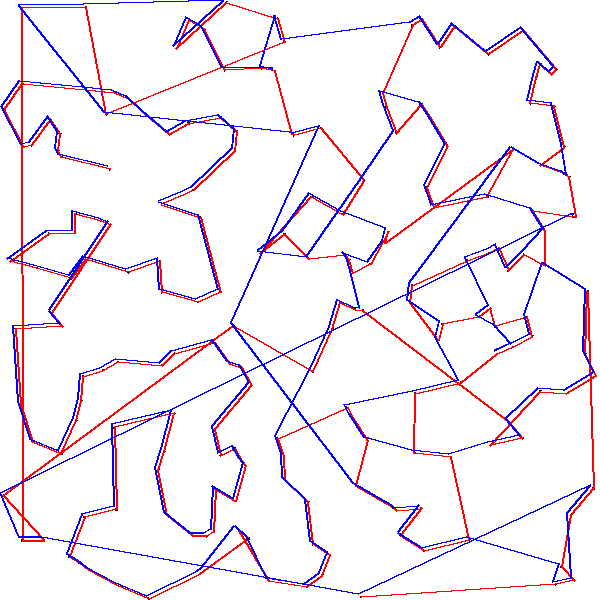

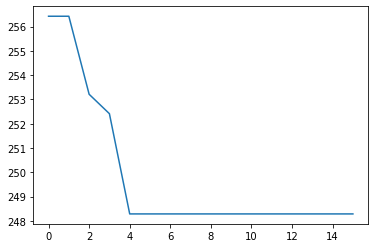

In [37]:
import time
tsp = TSP(n_nodes=200)
ant_colony_optimizer = AntColonyOptimizer(tsp, n_ants=250, evap_rate=0.25, alpha=1, beta=10)
nn = NearestNeighbour(tsp)

results_df = pd.DataFrame()
results = {}

results['algorithm'] = 'ACO'
start = time.time()
best_path, distances = ant_colony_optimizer.run(max_iter=100, convergence_steps = 10)
results['distance'] = min(distances)
results['time'] = time.time() - start
results_df = results_df.append(results, ignore_index=True)

iterations = len(distances)

results['algorithm'] = 'NN'
start = time.time()
nn_path, distance = nn.run()
results['distance'] = distance
results['time'] = time.time() - start
results_df = results_df.append(results, ignore_index=True)


tsp.render(paths=[best_path, nn_path])

plt.plot(distances)

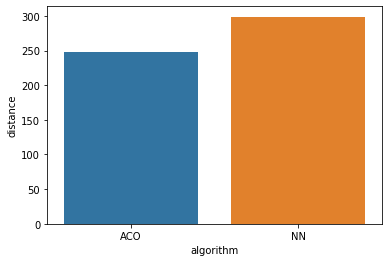

In [38]:
sns.barplot(data=results_df, y='distance', x='algorithm')

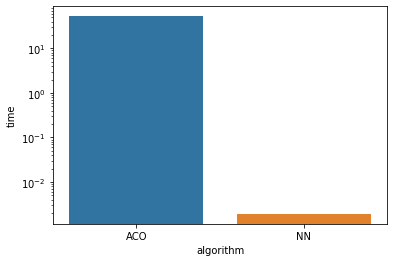

In [39]:
sns.barplot(data=results_df, y='time', x='algorithm')
plt.yscale('log')